# Symmetries

In [211]:
using Plots

function plotpolygon!(P; color=:blue, tickmark="") 

    plot!(P[1,:], P[2,:], series_type=:path, fill=true, color=color, alpha=0.25)
    #plot!(P[1,:], P[2,:], series_type=:path, fill=false, color=color)
    N = size(P,2)-1                 # number of distinct vertices
    labels = ['α' + n for n in 0:N] # produce ['A' 'B' 'C' ...]
    labels[N+1] = ' '               # replace last label with blank

    c = [sum(P[1,1:N])/N; sum(P[2,1:N])/N]  # center of polygon, avg of vertices
    L = 0.7*(P .- c) .+ c                   # locate labels just inside vertices
    ℓ = 2
    
    annotate!(L[1,:], L[2,:], labels)       # write labels
    plot!(aspect_ratio=1)
    plot!(xlim=(-ℓ,ℓ), ylim=(-ℓ,ℓ), legend=:none)
    plot!(xlabel="x"*tickmark, ylabel="y"*tickmark)
end

function plotpolygon(P; color=:blue, tickmark="")
    plot()                  # wipe out last plot
    plotpolygon!(P, color=color, tickmark=tickmark)  
end

function plotline!(P; color=:blue, title="", style=:solid) 
    plot!(P[1,:], P[2,:], series_type=:path, color=color, linestyle=style)
    plot!(aspect_ratio=1, legend=:none)
    #plot!(xlim=(-xylim,xylim), ylim=(-xylim,xylim))
    #plot!(title=title, size=(400,400))
end

function plotline(P; color=:blue, title="", style=:solid)
    plot()                  
    plotline!(P, color=color, title=title, xylim=xylim, style=style)  
end

function plotarrow!(P; color=:blue, title="", style=:solid) 
    plot!(P[1,:], P[2,:], series_type=:path, arrow=:arrow, color=color, linestyle=style)
    plot!(aspect_ratio=1, legend=:none)
    #plot!(xlim=(-xylim,xylim), ylim=(-xylim,xylim))
    #plot!(title=title, size=(400,400))
end

function plotrot(θ, textθ; r=0.3)
    plot()                  
    plotrot!(θ, textθ, r=0.3)  
end

function plotrot!(θ, textθ; r=0.3)
    ϕ = range(-π/6, θ-π/6, step=0.1);
    c = r*[cos.(ϕ)'; sin.(ϕ)']
    plotarrow!(c, color=:black, style=:dot)
    annotate!([0.0], [0.125], text(textθ, 10))
end
rotation(θ) = [cos(θ) -sin(θ) ; sin(θ) cos(θ)]

rotation (generic function with 1 method)

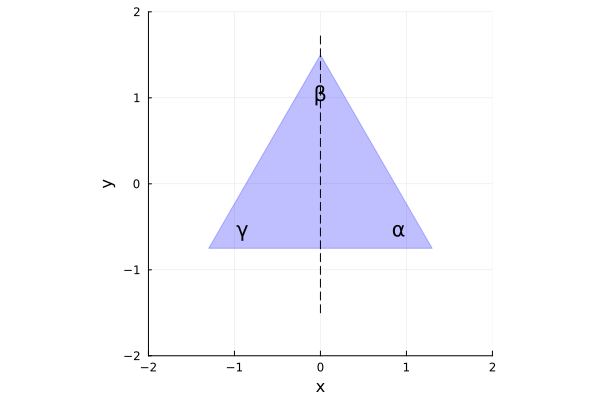

In [178]:
N = 3; R = rotation(-π/6)
#N = 4; R = rotation(π/4)
#N = 5; R = rotation(π/10)
#N = 6; R = rotation(0)

θ = range(0,2π,N+1)
P =  1.5*R*[cos.(θ)'; sin.(θ)'] # (x,y) values of vertices, rotated to look nice
plotpolygon(P, color=:blue)
plotline!([0 0; -1.5 1.75], style=:dash, color=:black)

#plotrot!(2π/3, "2π/3")
p1 = plot!() 

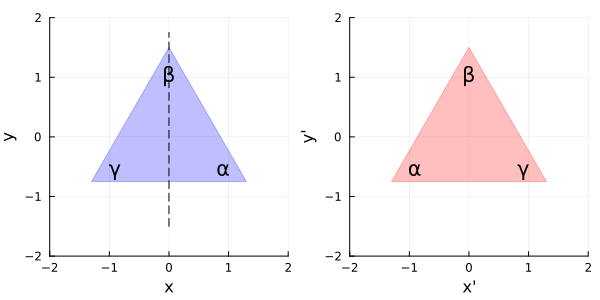

In [179]:
Sx = [-1 0; 0 1]
p2 = plotpolygon(Sx*P, color=:red, tickmark="'")
plot(p1,p2, size=(600, 300))

In [180]:
savefig("triangle-sx-symmetry.png")

"/home/gibson/professional/teaching/2025-06/411/06-symmetries/triangle-sx-symmetry.png"

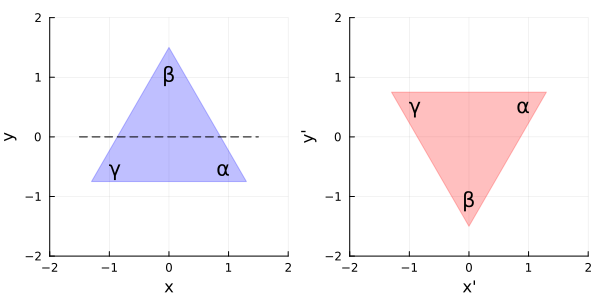

In [181]:
plotpolygon(P, color=:blue)
plotline!([-1.5 1.5; 0 0], style=:dash, color=:black)
p1 = plot!() 

Sy = [1 0; 0 -1]
p2 = plotpolygon(Sy*P, color=:red, tickmark="'")
plot(p1,p2, size=(600, 300))

In [182]:
savefig("triangle-sy.png")

"/home/gibson/professional/teaching/2025-06/411/06-symmetries/triangle-sy.png"

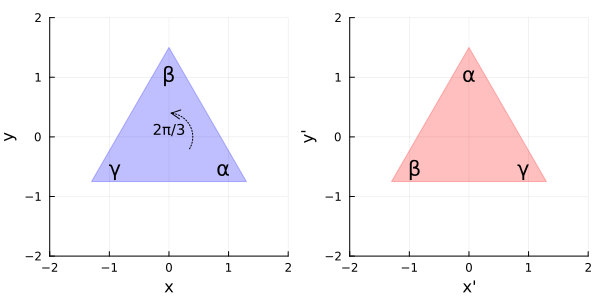

In [214]:
plotpolygon(P, color=:blue)
plotrot!(2π/3, "2π/3", r=0.4)

p1 = plot!() 

R = rotation(2π/3)
p2 = plotpolygon(R*P, color=:red, tickmark="'")
plot(p1,p2, size=(600, 300))

In [215]:
savefig("triangle-R.png")

"/home/gibson/professional/teaching/2025-06/411/06-symmetries/triangle-R.png"

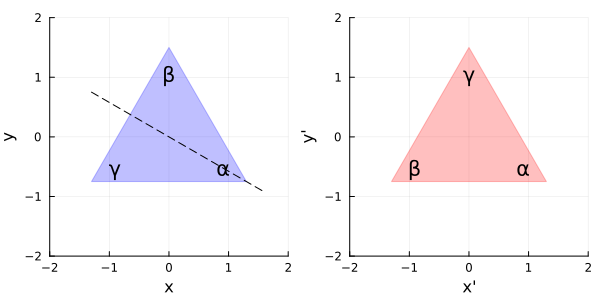

In [206]:
plotpolygon(P, color=:blue)

R = rotation(π/3)
plotline!(R*[0 0 ; -1.8 1.5], style=:dash, color=:black)
p1 = plot!() 

R = rotation(2π/3)
Sα = inv(R)*Sx*R
p2 = plotpolygon(Sα*P, color=:red, tickmark="'")
plot(p1,p2, size=(600, 300))

In [207]:
savefig("triangle-Salpha.png")

"/home/gibson/professional/teaching/2025-06/411/06-symmetries/triangle-Salpha.png"

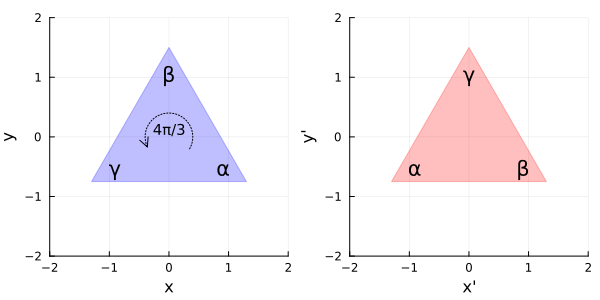

In [216]:
plotpolygon(P, color=:blue)
plotrot!(4π/3, "4π/3", r=0.4)

p1 = plot!() 

R = rotation(4π/3)
p2 = plotpolygon(R*P, color=:red, tickmark="'")
plot(p1,p2, size=(600, 300))

In [217]:
savefig("triangle-R2.png")

"/home/gibson/professional/teaching/2025-06/411/06-symmetries/triangle-R2.png"

## translation

In [ ]:
b = [2; -0.5]

p2 = plotpolygon(P .+ b)

plot(p1,p2)

## rotation

In [32]:
θ = π/6
R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

2×2 Matrix{Float64}:
 0.866025  -0.5
 0.5        0.866025

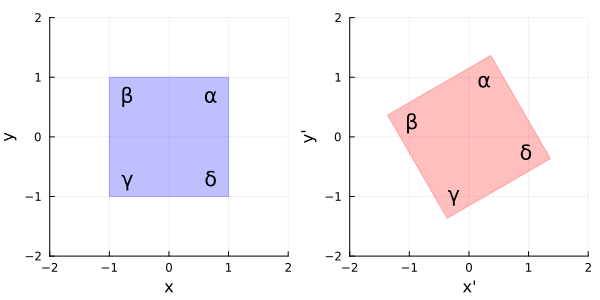

In [80]:
p2 = plotpolygon(R*P; tickmark="'", color=:red)
plot(p1,p2, size=(600,300))

In [81]:
savefig("rotation_square.png")

"/home/gibson/professional/teaching/2025-06/411/03-transformations/rotation_square.png"

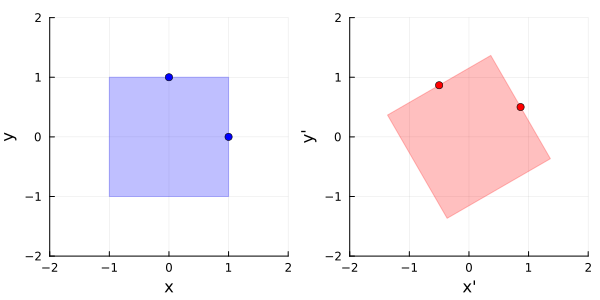

In [82]:
plot(P[1,:], P[2,:], series_type=:path, fill=true, color=:blue, alpha=0.25)
scatter!([1; 0], [0;1], color=:blue)
plot!(aspect_ratio=1, legend=:none)
plot!(xlim=(-2,2), ylim=(-2,2))
p1 = plot!(xlabel="x", ylabel="y")

RP = R*P
plot(RP[1,:], RP[2,:], series_type=:path, fill=true, color=:red, alpha=0.25)
scatter!([cos(θ); -sin(θ)], [sin(θ); cos(θ)], color=:red)
plot!(aspect_ratio=1, legend=:none)
plot!(xlim=(-2,2), ylim=(-2,2))
p2 = plot!(xlabel="x'", ylabel="y'")

plot(p1,p2, size=(600,300))

In [83]:
savefig("rotation_square_b.png")

"/home/gibson/professional/teaching/2025-06/411/03-transformations/rotation_square_b.png"

## reflection...

### ...about y axis (inversion of x)

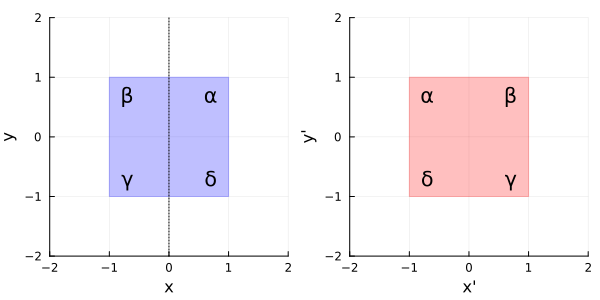

In [84]:
Sx = [-1 0; 0 1]

plotpolygon(Sx*P)

plotpolygon(P)
p1 = plot!([0; 0], [-2; 2], color=:black, linestyle=:dot)

p2 = plotpolygon(Sx*P, color=:red, tickmark="'")
plot(p1, p2, size=(600,300))

In [85]:
savefig("xreflection.png")

"/home/gibson/professional/teaching/2025-06/411/03-transformations/xreflection.png"

## about x axis (inversion of y)

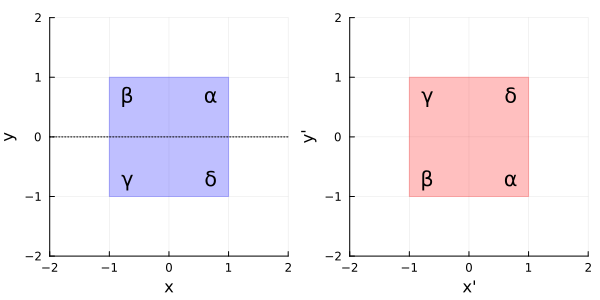

In [86]:
Sy = [1 0; 0 -1]

plotpolygon(Sy*P)

plotpolygon(P)
p1 = plot!([-2; 2], [0; 0], color=:black, linestyle=:dot)

p2 = plotpolygon(Sy*P, tickmark="'", color=:red)
plot(p1, p2, size=(600,300))

In [87]:
savefig("yreflection.png")

"/home/gibson/professional/teaching/2025-06/411/03-transformations/yreflection.png"

### ... about $\theta = \pi/4$

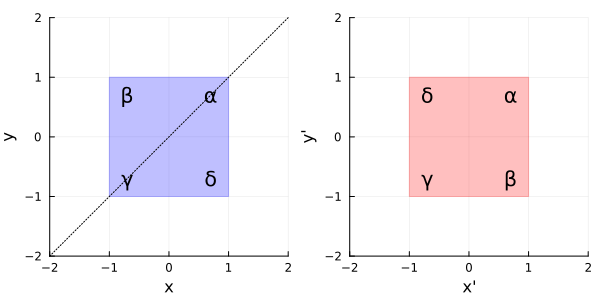

In [88]:
θ = pi/4

R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

Sdiag= R' * Sx * R

plotpolygon(P)
p1 = plot!([-2; 2], [-2; 2], color=:black, linestyle=:dot)
p2 = plotpolygon(Sdiag*P, tickmark="'", color=:red)
plot(p1,p2, size=(600,300))

In [89]:
savefig("diagonalreflection.png")

"/home/gibson/professional/teaching/2025-06/411/03-transformations/diagonalreflection.png"

### ... about $\theta = -\pi/4$

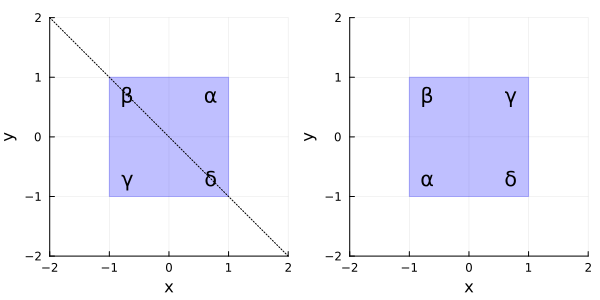

In [90]:
θ = -pi/4

R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

Sdiag = R' * Sx * R

plotpolygon(P)
p1 = plot!([-2; 2], [2; -2], color=:black, linestyle=:dot)
p2 = plotpolygon(Sdiag*P)
plot(p1,p2, size=(600,300))

## Chained transformations, matrix-matrix multiplication

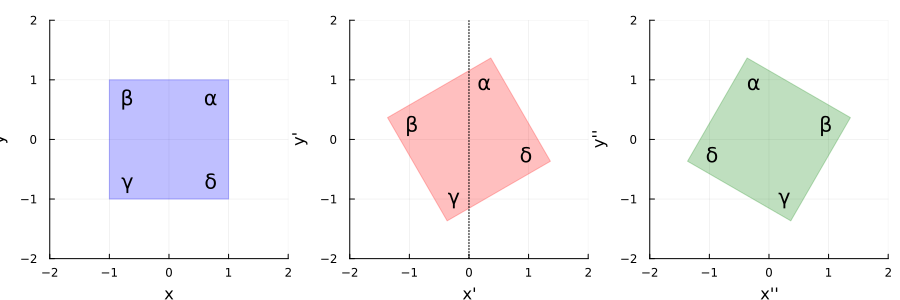

In [91]:
p1 = plotpolygon(P, color=:blue)

θ = π/6
R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

p2 = plotpolygon(R*P, color=:red, tickmark="'")
p2 = plot!([0; 0], [-2; 2], color=:black, linestyle=:dot)

p3 = plotpolygon(Sx*R*P, color=:green, tickmark="''")
plot(p1,p2,p3, layout=(1,3), size=(900,300))

In [92]:
savefig("chained-transformation-1.png")

"/home/gibson/professional/teaching/2025-06/411/03-transformations/chained-transformation-1.png"

In [ ]:
? annotate!

$\neq$